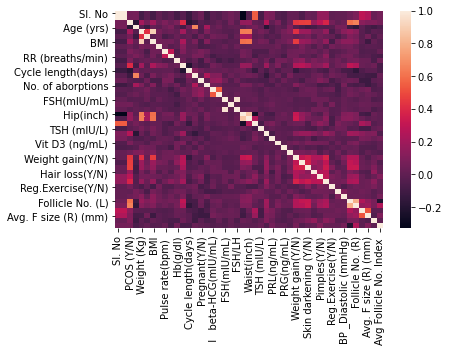

In [1]:
# Huzefa Ansari | BMEN 415 | Final Project | Regression Models | Lasso

import numpy as np
from sklearn.model_selection import train_test_split
import pandas as pd
import seaborn as sns
from sklearn.metrics import mean_squared_error, r2_score
import math
import matplotlib.pyplot as plt

# Find Data File

dataFile = pd.read_csv ('PCOS_data_without_infertilityV2.csv')

dataFile_hm = sns.heatmap(dataFile.corr(), annot = False)

In [2]:
# Load and Curate Data

dataFile = dataFile.dropna()

dataFile = dataFile.drop('Sl. No', axis = 1)
dataFile = dataFile.drop('Patient File No.', axis = 1)
dataFile = dataFile.drop('Follicle No. (L)', axis = 1)
dataFile = dataFile.drop('Follicle No. (R)', axis = 1)

x = dataFile.drop(columns = ['Avg Follicle No. Index ']).copy()
y = dataFile ['Avg Follicle No. Index ']

# Create Test/Train Split

x_train, x_test, y_train, y_test = train_test_split (x,y,test_size = 0.2, random_state = 42)

Root Mean Squared Error for the Test Dataset: 0.8407156907895386
Root Mean Squared Error for the Train Dataset: 0.7766043061745729
R^2 for the Test Dataset for the Test Dataset: -0.00012442662967004914
R^2 for the Train Dataset for the Train Dataset: 0.0029809429033397228


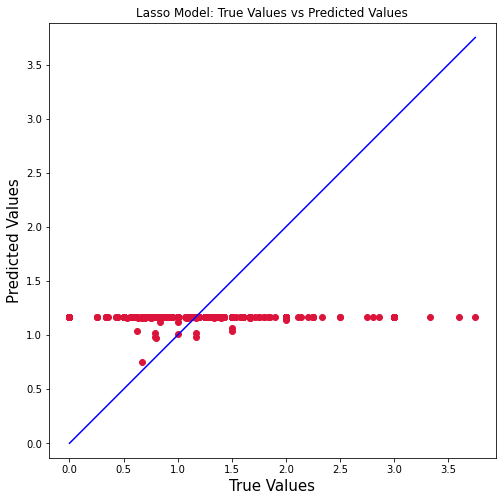

(None,)

In [3]:
# Import Class

from sklearn import linear_model

# Fit Model and Predict

linearModel = linear_model.Lasso(alpha = 1.0)
linearModel.fit (x_train,y_train)
linearModelPrediction = linearModel.predict (x_test)
linearModelTrainPrediction = linearModel.predict (x_train)

# Metrics

print ("Root Mean Squared Error for the Test Dataset:", math.sqrt (mean_squared_error(y_test, linearModelPrediction, squared = False)))
print ("Root Mean Squared Error for the Train Dataset:", math.sqrt (mean_squared_error(y_train, linearModelTrainPrediction, squared = False)))
print ("R^2 for the Test Dataset for the Test Dataset:", r2_score(y_test,linearModelPrediction))
print ("R^2 for the Train Dataset for the Train Dataset:", r2_score(y_train,linearModelTrainPrediction))

# Showcase Scatter Plot

plt.figure(figsize=(8,8))
plt.scatter(y_train, linearModelTrainPrediction, c='crimson') 

p1 = max(max(linearModelTrainPrediction), max(y_train))
p2 = min(min(linearModelTrainPrediction), min(y_train))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predicted Values', fontsize=15)
plt.title("Lasso Model: True Values vs Predicted Values") 
plt.axis('equal')
plt.show(),